In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

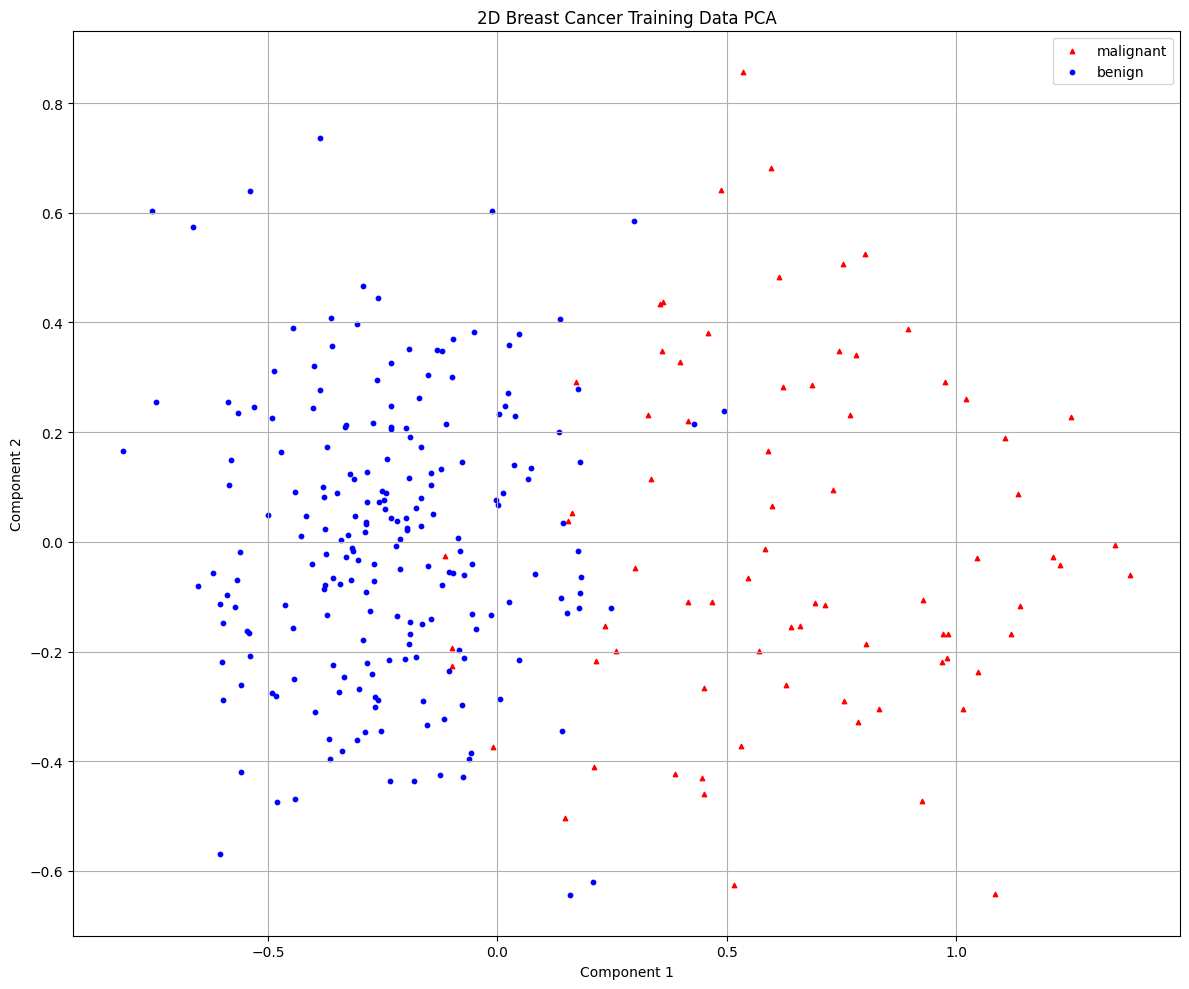

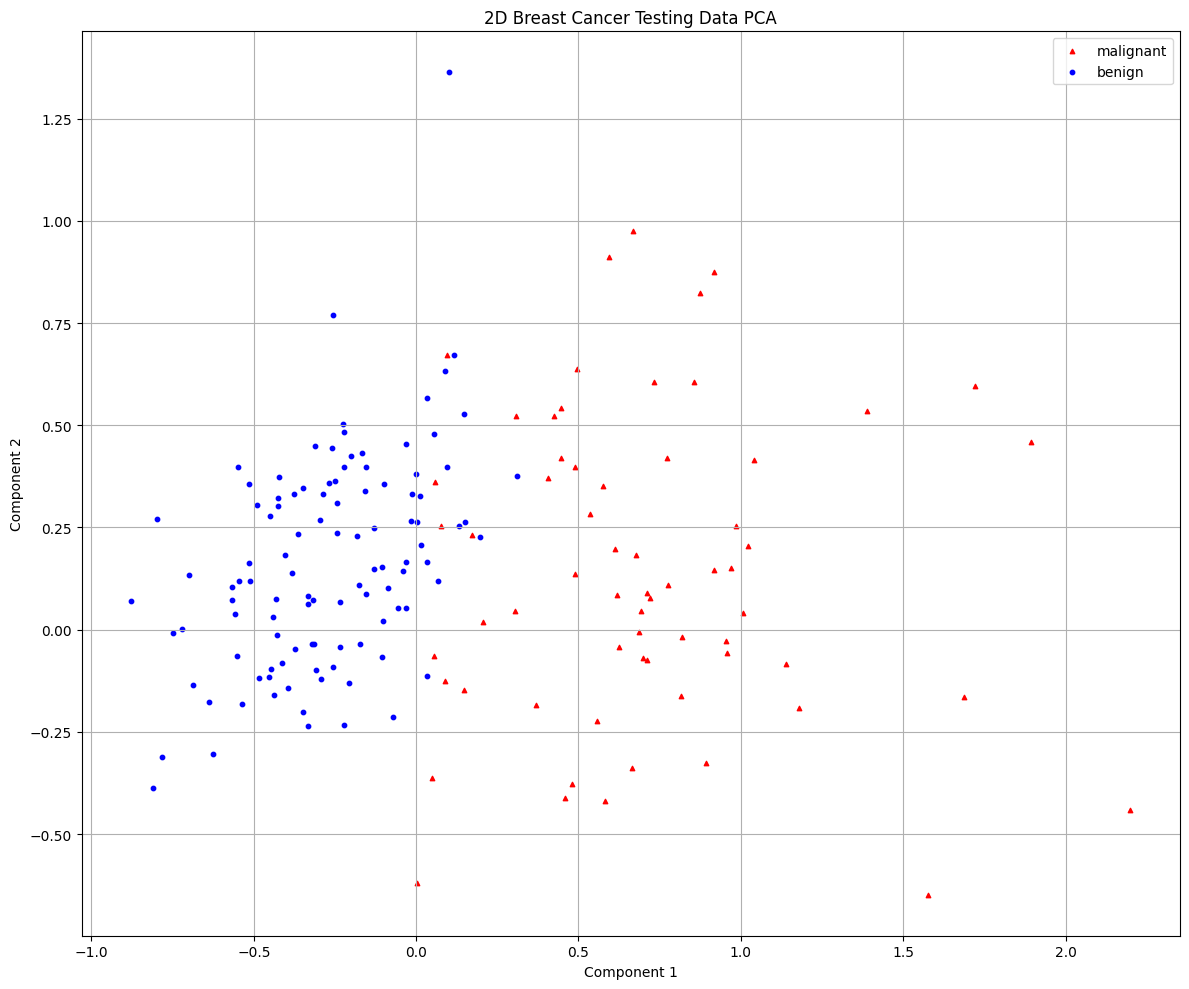

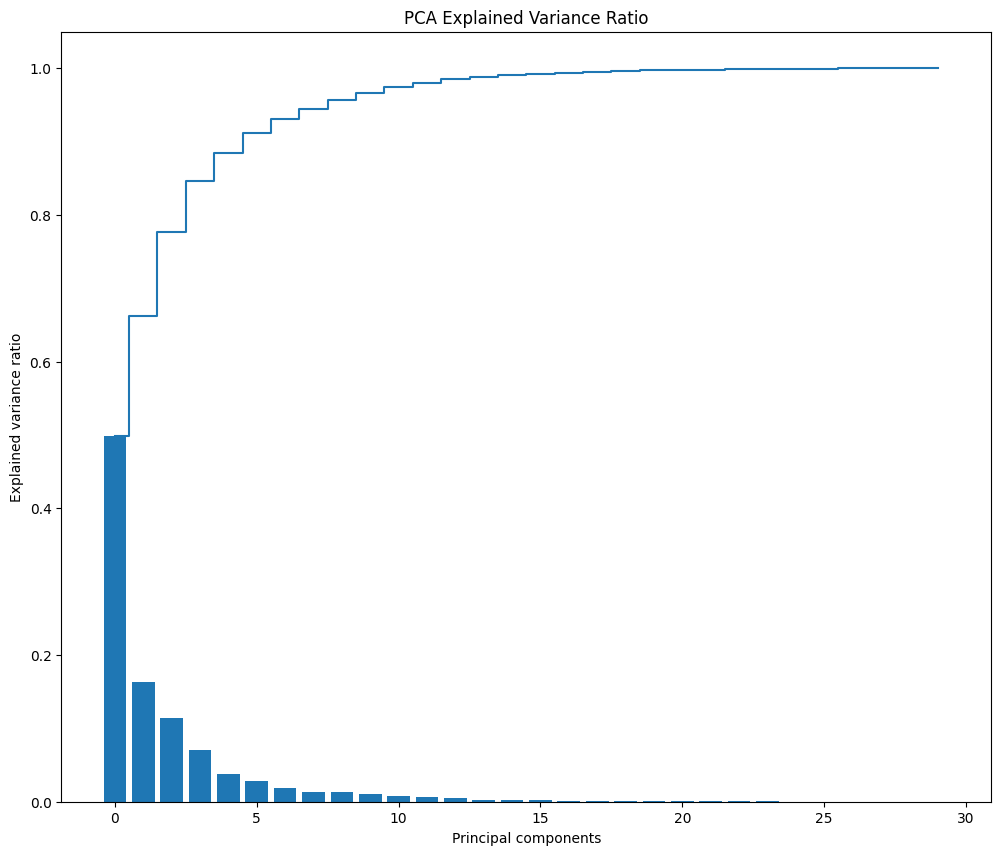

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

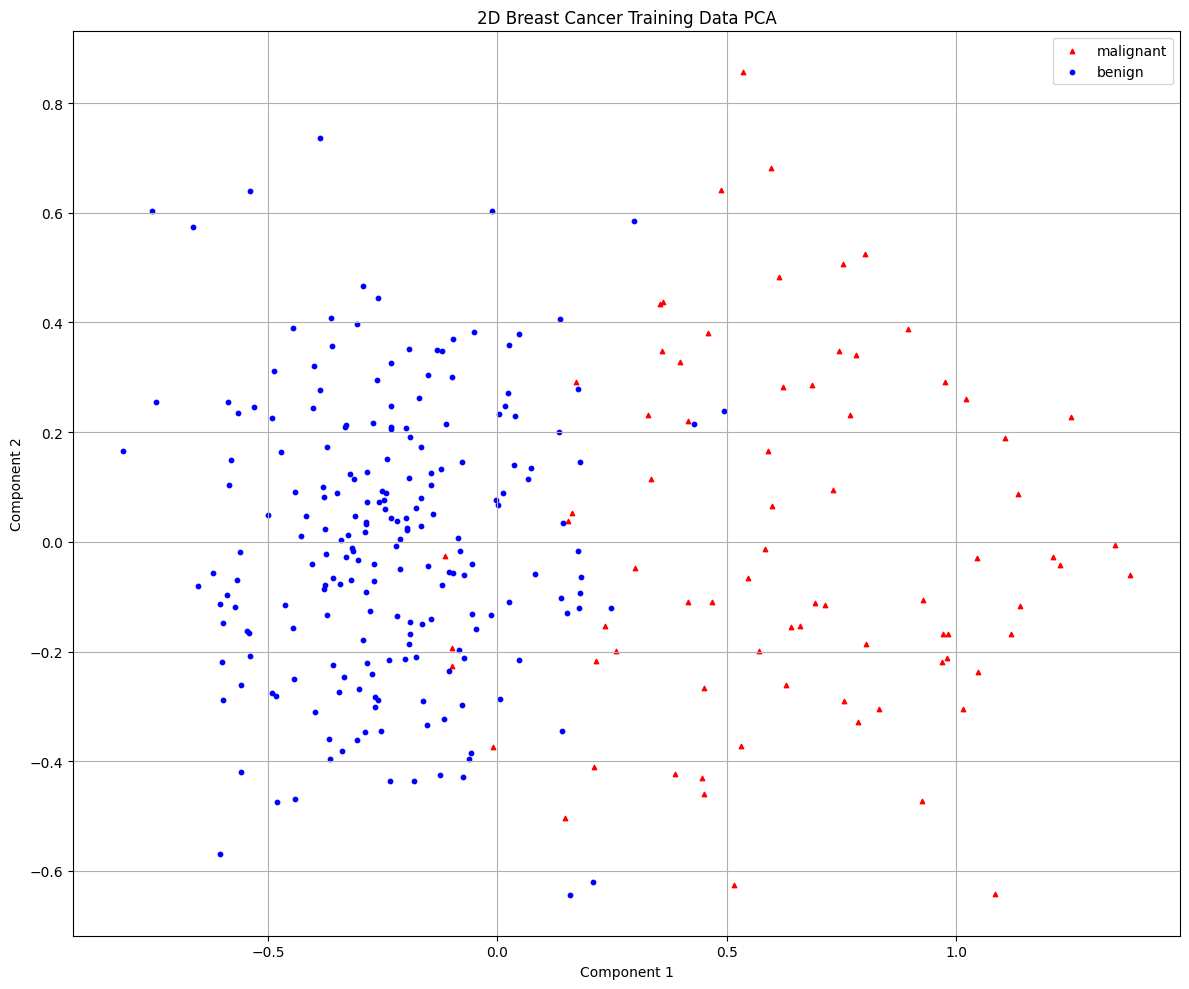

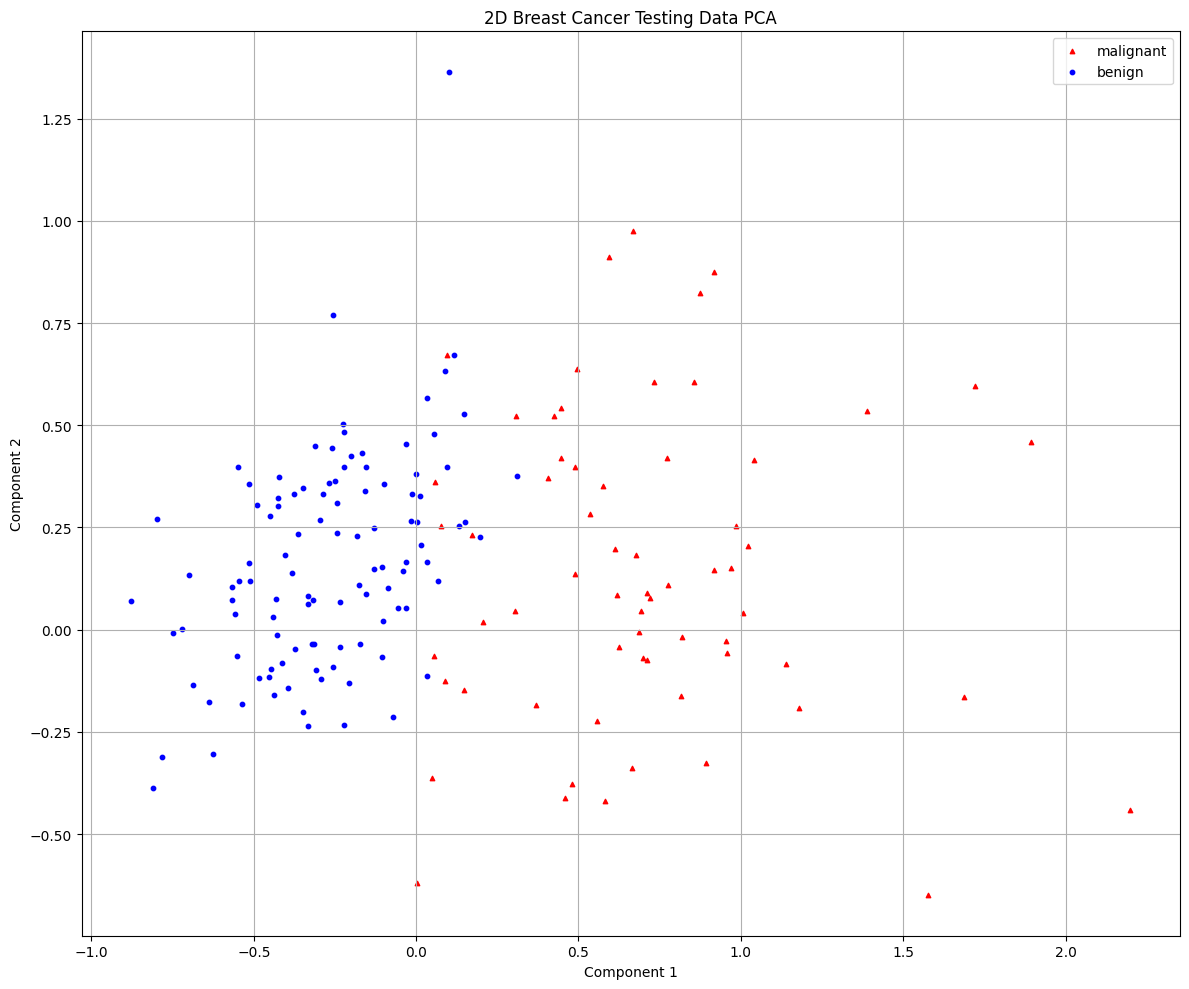

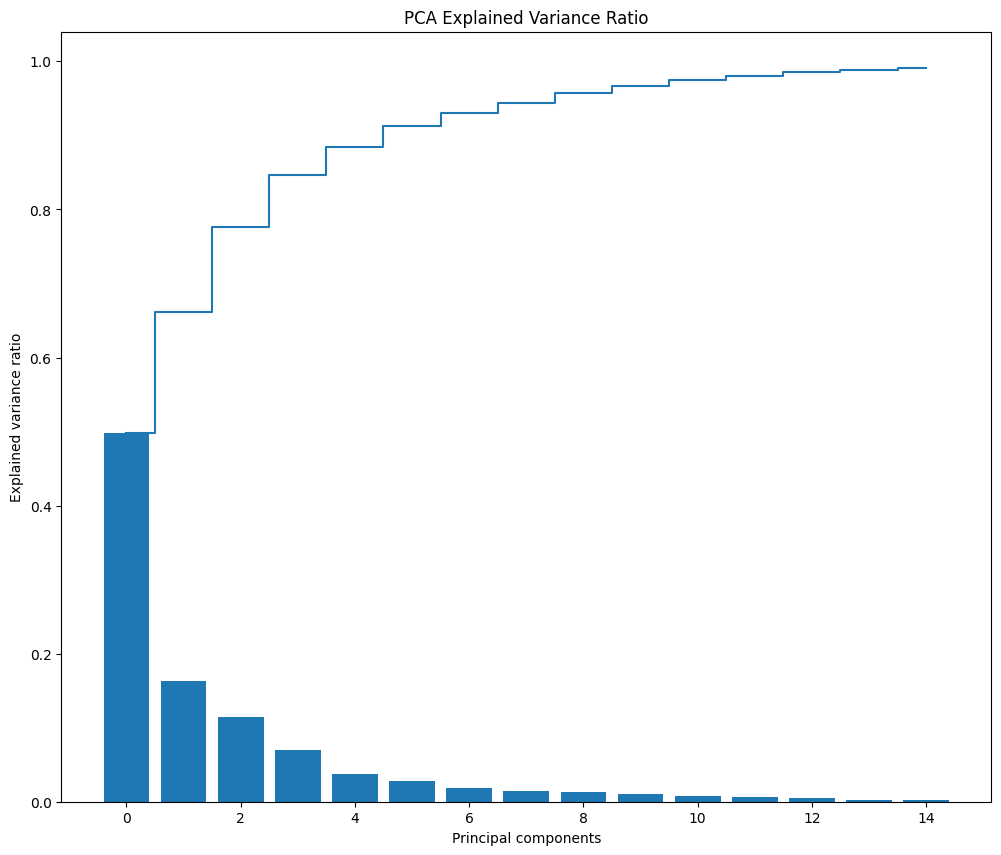

[I 2025-04-27 11:18:44,686] A new study created in memory with name: no-name-1399b32c-9836-44ee-980b-9ec10b856bc0
[I 2025-04-27 11:18:44,702] Trial 0 finished with value: 0.9057471264367816 and parameters: {'C': 0.05032055952363053, 'kernel': 'linear', 'max_iter': 401}. Best is trial 0 with value: 0.9057471264367816.
[I 2025-04-27 11:18:44,717] Trial 1 finished with value: 0.9649122807017543 and parameters: {'C': 23.88165661873376, 'kernel': 'sigmoid', 'gamma': 0.03150051431195405, 'max_iter': 9631}. Best is trial 1 with value: 0.9649122807017543.
[I 2025-04-27 11:18:44,733] Trial 2 finished with value: 0.7307924984875983 and parameters: {'C': 1.5369041651411182, 'kernel': 'poly', 'gamma': 0.0016675559182946886, 'degree': 5, 'max_iter': 3588}. Best is trial 1 with value: 0.9649122807017543.
[I 2025-04-27 11:18:44,755] Trial 3 finished with value: 0.7307924984875983 and parameters: {'C': 0.038210848968434255, 'kernel': 'rbf', 'gamma': 0.052006285126123805, 'max_iter': 1846}. Best is tri

Best trial:
Accuracy: 0.9825166364186328
Best hyperparameters:  {'C': 1.7976743477388315, 'kernel': 'linear', 'max_iter': 9250}


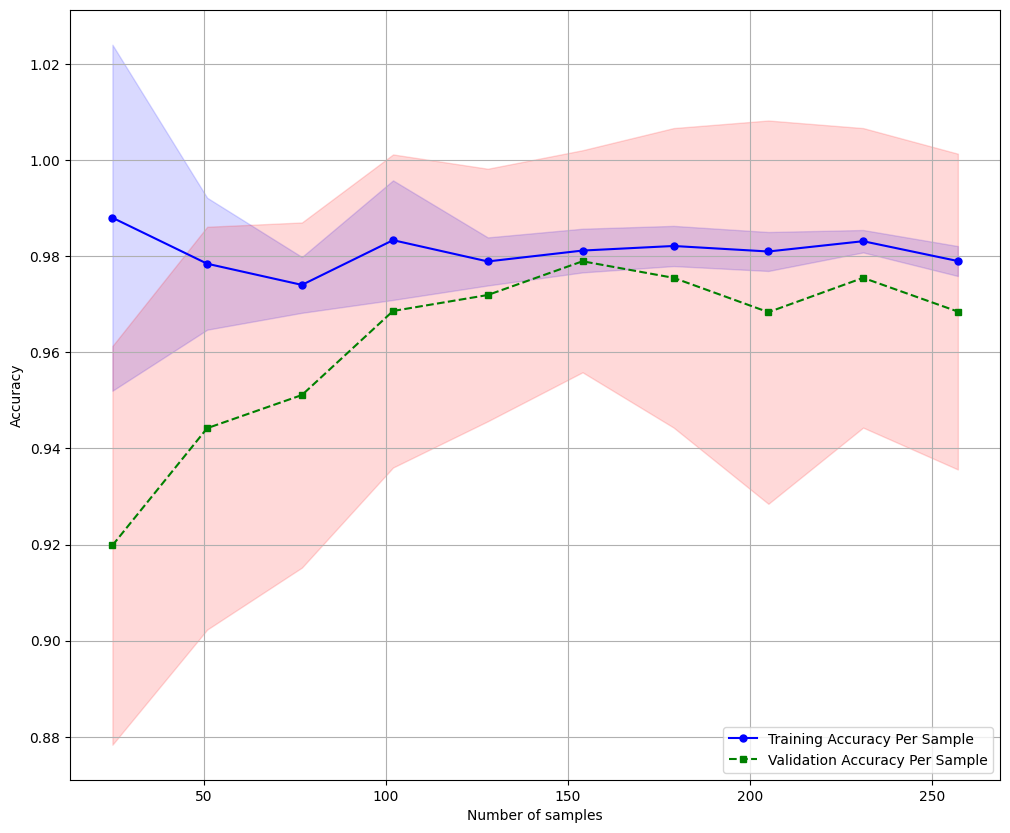

Confusion Matrix
[[ 53  11]
 [  0 107]]
Accuracy: 0.9357, Precision: 0.9068, Recall: 1.0000, F1: 0.9511, AUC: 0.9915


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)